Подключение библиотек:

In [51]:
import glob
from PIL import Image

import torch
import torch.nn as nn
import torch
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader, Dataset 
#using numpy
import numpy as np

#for data load or save
import pandas as pd

#visualize some datasets
import matplotlib.pyplot as plt

#check our work directory
import os

1-2:
Создание списка путей к картинкам, разделение на выборки:

In [52]:
images_list = []
images_list = glob.glob(os.path.join('C:/Users/user/Desktop/dataset1','*.jpg'))
train_list = images_list[0 : int(len(images_list)*0.8)]
test_list = images_list[int(len(images_list)*0.8) : int(len(images_list)*0.9)]
val_list = images_list[int(len(images_list)*0.9) : int(len(images_list))]

Проверка:

In [53]:
print(len(images_list))
print(images_list[:5])
    
print(len(train_list))
print(train_list[:5])
    
print(len(test_list))
print(test_list[:5])
    
print(len(val_list))
print(val_list[:5])

292
['C:/Users/user/Desktop/dataset1\\bay horse_0000.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0001.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0002.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0003.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0004.jpg']
233
['C:/Users/user/Desktop/dataset1\\bay horse_0000.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0001.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0002.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0003.jpg', 'C:/Users/user/Desktop/dataset1\\bay horse_0004.jpg']
29
['C:/Users/user/Desktop/dataset1\\zebra_0019.jpg', 'C:/Users/user/Desktop/dataset1\\zebra_0020.jpg', 'C:/Users/user/Desktop/dataset1\\zebra_0021.jpg', 'C:/Users/user/Desktop/dataset1\\zebra_0022.jpg', 'C:/Users/user/Desktop/dataset1\\zebra_0023.jpg']
30
['C:/Users/user/Desktop/dataset1\\zebra_0057.jpg', 'C:/Users/user/Desktop/dataset1\\zebra_0058.jpg', 'C:/Users/user/Desktop/dataset1\\zebra_0059.jpg', 'C:/Users/user/Desktop/dataset1\\zebra_006

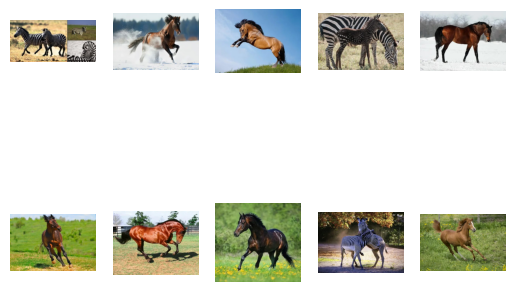

In [54]:
random_idx = np.random.randint(1,len(images_list),size=10)

fig = plt.figure()
i=1
for idx in random_idx:
    ax = fig.add_subplot(2,5,i)
    img = Image.open(images_list[idx])
    plt.imshow(img)
    i+=1
    plt.axis('off')


plt.show()

Класс Dataset
(метки 0 - zebra, 1 - bay horse)

In [66]:
class Dataset(torch.utils.data.Dataset):
    
    def __init__(self,file_list,transform=None):
        self.file_list = file_list
        self.transform = transform
        
        
    #dataset length
    def __len__(self):
        self.filelength = len(self.file_list)
        return self.filelength
    
    #load an one of images
    def __getitem__(self,idx):
        img_path = self.file_list[idx]
        #print(img_path)
        img = Image.open(img_path)
        img_transformed = self.transform(img.convert("RGB")) #
        
        label = img_path.split('\\')[-1].split('_')[0]
        if label == 'zebra':
            label=0
        elif label == 'bay horse':
            label=1 
            
        return img_transformed,label

4:  Пайплайн предобработки данных 

In [67]:
train_transforms =  transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])

val_transforms = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])

test_transforms = transforms.Compose([   
        transforms.Resize((224, 224)),
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
    
train_data = Dataset(train_list, transform=train_transforms)
test_data = Dataset(test_list, transform=test_transforms)
val_data = Dataset(val_list, transform=val_transforms)

Проверка:

In [68]:
print(train_data[1])
print(val_data[0][1])

(tensor([[[0.6784, 0.6824, 0.6863,  ..., 0.4510, 0.4471, 0.4431],
         [0.5686, 0.5686, 0.5647,  ..., 0.3961, 0.3922, 0.3882],
         [0.4510, 0.4431, 0.4314,  ..., 0.4078, 0.4039, 0.3961],
         ...,
         [0.1490, 0.1490, 0.1451,  ..., 0.5451, 0.5529, 0.5608],
         [0.1373, 0.1333, 0.1255,  ..., 0.5569, 0.5529, 0.5490],
         [0.1294, 0.1255, 0.1176,  ..., 0.5686, 0.5490, 0.5333]],

        [[0.5137, 0.5176, 0.5216,  ..., 0.3137, 0.3098, 0.3098],
         [0.4196, 0.4196, 0.4157,  ..., 0.2667, 0.2627, 0.2627],
         [0.3137, 0.3059, 0.2941,  ..., 0.2824, 0.2784, 0.2745],
         ...,
         [0.0863, 0.0824, 0.0745,  ..., 0.5137, 0.5255, 0.5294],
         [0.0745, 0.0706, 0.0627,  ..., 0.5294, 0.5294, 0.5255],
         [0.0706, 0.0667, 0.0588,  ..., 0.5451, 0.5255, 0.5098]],

        [[0.3725, 0.3765, 0.3804,  ..., 0.1922, 0.1882, 0.1843],
         [0.2824, 0.2824, 0.2784,  ..., 0.1451, 0.1412, 0.1373],
         [0.1843, 0.1765, 0.1647,  ..., 0.1608, 0.1529, 0

3:  Сверточная нейронная сеть

In [58]:
lr = 0.001 # learning_rate
batch_size = 100 # we will use mini-batch method

Загрузка наборов данных:

In [69]:
train_loader = torch.utils.data.DataLoader(dataset = train_data, 
                                           batch_size=batch_size, 
                                           shuffle=True )

test_loader = torch.utils.data.DataLoader(dataset = test_data, 
                                          batch_size=batch_size, 
                                          shuffle=False)

val_loader = torch.utils.data.DataLoader(dataset = val_data, 
                                         batch_size=batch_size, 
                                         shuffle=False)

Проверка:

In [70]:
print(len(train_data), len(train_loader))
print(len(val_data), len(val_loader))
train_data[0][0].shape

233 3
30 1


torch.Size([3, 224, 224])

Модель сверточной нейросети для решения задачи классификации:

In [71]:
class Cnn(nn.Module):
    def __init__(self):
        super(Cnn,self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size=3, padding=0,stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16,32, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2)
            )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=3, padding=0, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        
        self.fc1 = nn.Linear(3*3*64,10)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(10,1)
        self.relu = nn.ReLU()
        
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = torch.nn.Flatten()(out)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return torch.nn.Sigmoid()(out)

5:  Цикл обучения и эксперименты

In [72]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1234)
if device =='cuda':
    torch.cuda.manual_seed_all(1234)
    
model = Cnn().to(device)

Задание параметров обработки:

In [73]:
optimizer = optim.Adam(params = model.parameters(),lr=0.001)
criterion = nn.BCELoss()

Цикл обучения нейросети:

In [74]:
accuracy_values = []
loss_values = []

val_accuracy_values = []
val_loss_values = []

def train_loop(train_loader, val_loader):
    epochs = 10
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        epoch_accuracy = 0
        
        for data, label in train_loader:
            data = data.to(device)
            label = label.to(device)
            
            output = model(data)
            loss = criterion(output, label.unsqueeze(dim=1).to(torch.float))
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            acc = ((output.argmax(dim=1) == label).float().mean())
            epoch_accuracy += acc/len(train_loader)
            epoch_loss += loss/len(train_loader)
            
        print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))
        
        accuracy_values.append(epoch_accuracy.item())
        loss_values.append(epoch_loss.item())
        
        model.eval()
        epoch_val_accuracy=0
        epoch_val_loss =0
        for data, label in val_loader:
            data = data.to(device)
            label = label.to(device)
            
            val_output = model(data)
            val_loss = criterion(val_output,label.unsqueeze(dim=1).to(torch.float))
            
            
            acc = ((val_output.argmax(dim=1) == label).float().mean())
            epoch_val_accuracy += acc/ len(val_loader)
            epoch_val_loss += val_loss/ len(val_loader)
            
        val_accuracy_values.append(epoch_val_accuracy.item())
        val_loss_values.append(epoch_val_loss.item())
        print('Epoch : {}, val_accuracy : {}, val_loss : {}'.format(epoch+1, epoch_val_accuracy,epoch_val_loss))
        print('\n')

In [75]:
train_loop(train_loader, val_loader)

Epoch : 1, train accuracy : 0.08363635838031769, train loss : 0.5292381644248962
Epoch : 1, val_accuracy : 1.0, val_loss : 0.6370100378990173


Epoch : 2, train accuracy : 0.0768686830997467, train loss : 0.7179203033447266
Epoch : 2, val_accuracy : 1.0, val_loss : 0.740942656993866


Epoch : 3, train accuracy : 0.08363635838031769, train loss : 0.6188090443611145
Epoch : 3, val_accuracy : 1.0, val_loss : 1.0342247486114502


Epoch : 4, train accuracy : 0.08363635838031769, train loss : 0.4460720121860504
Epoch : 4, val_accuracy : 1.0, val_loss : 2.039395570755005


Epoch : 5, train accuracy : 0.0768686905503273, train loss : 0.2940971553325653
Epoch : 5, val_accuracy : 1.0, val_loss : 4.044497013092041


Epoch : 6, train accuracy : 0.08363635838031769, train loss : 0.38585734367370605
Epoch : 6, val_accuracy : 1.0, val_loss : 4.791195869445801


Epoch : 7, train accuracy : 0.08363636583089828, train loss : 0.373034805059433
Epoch : 7, val_accuracy : 1.0, val_loss : 3.79679012298584




6:  Построение графиков

In [76]:
def show_results(acc, loss):
    plt.figure(figsize=(15, 5))
    plt.plot(range(10), acc, color="green")
    plt.legend(["Accuracy"])
    plt.show()

    plt.figure(figsize=(15, 5))
    plt.plot(range(10), loss, color="blue")
    plt.legend(["Loss"])
    plt.show() 
    
    print(acc, '\n',loss)

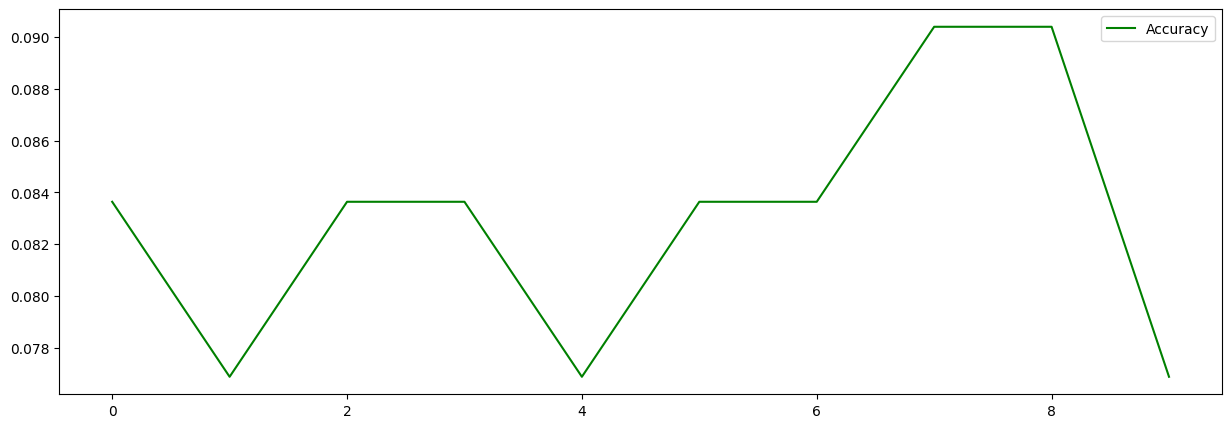

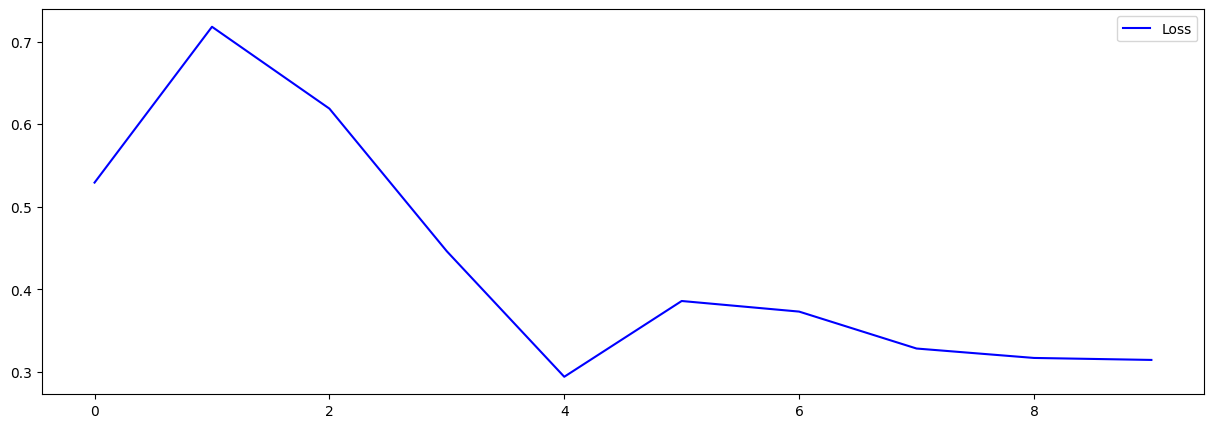

[0.08363635838031769, 0.0768686830997467, 0.08363635838031769, 0.08363635838031769, 0.0768686905503273, 0.08363635838031769, 0.08363636583089828, 0.09040403366088867, 0.09040403366088867, 0.0768686830997467] 
 [0.5292381644248962, 0.7179203033447266, 0.6188090443611145, 0.4460720121860504, 0.2940971553325653, 0.38585734367370605, 0.373034805059433, 0.3283083438873291, 0.3169039487838745, 0.31449776887893677]


In [77]:
#обучающая:
show_results(accuracy_values, loss_values)

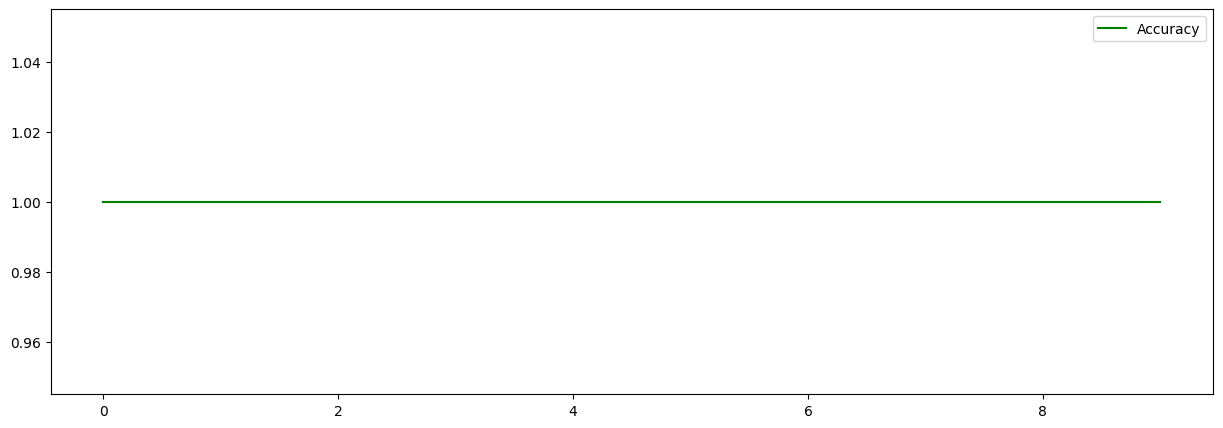

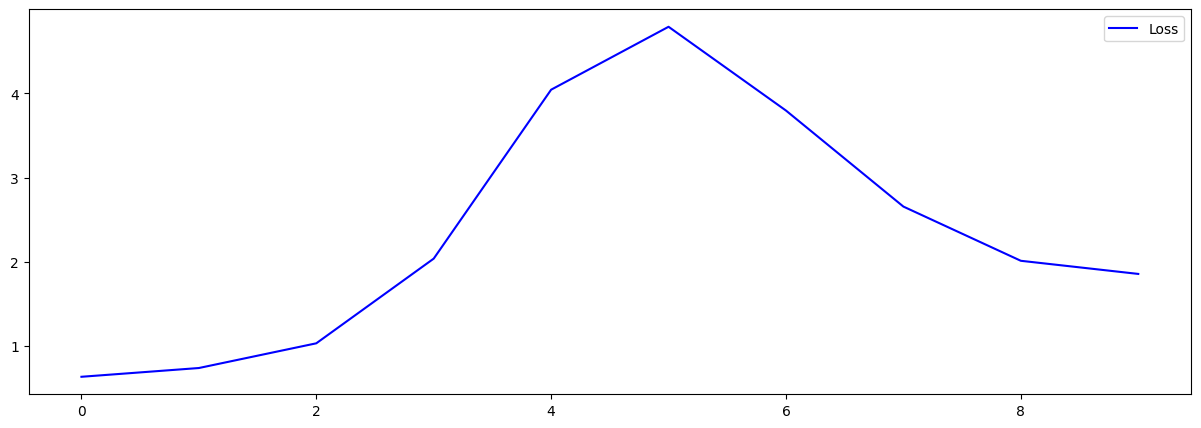

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 
 [0.6370100378990173, 0.740942656993866, 1.0342247486114502, 2.039395570755005, 4.044497013092041, 4.791195869445801, 3.79679012298584, 2.657055616378784, 2.0136709213256836, 1.8577805757522583]


In [78]:
#валидационная:
show_results(val_accuracy_values, val_loss_values)

Сохранение модели:

In [79]:
torch.save(model.state_dict(), 'model.pt')